In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('./data/data.xlsx', index_col=0)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2023-04-24 00시,236,251,253,254,265,279,261,279,140,183
1,2023-04-24 01시,211,190,164,192,184,241,208,243,126,138
2,2023-04-24 02시,145,161,115,200,152,184,151,173,83,94
3,2023-04-24 03시,162,170,105,185,119,152,196,141,59,86
4,2023-04-24 04시,200,299,151,47,181,289,362,207,135,169


In [3]:
input_volumes = pd.read_excel('./data/input_volume.xlsx', index_col=0)
input_volumes

,0_0,0_2,1_3,2_2,3_2,3_1,4_1,4_2
0,295,491,158,254,208,232,300,252
1,216,437,103,226,189,141,185,220
2,195,314,93,197,147,128,187,147
3,205,352,68,256,204,119,258,143
4,482,520,161,438,313,335,747,205
...,...,...,...,...,...,...,...,...
115,1435,2103,738,1313,1133,1080,1249,1479
116,1129,1850,673,1168,897,857,1096,1256
117,989,1627,527,1051,750,830,893,1033
118,875,1407,438,843,628,628,775,818


In [4]:
train_eT = np.array(data.iloc[56,1:].values)
train_eT

array([1005, 1553, 1180, 1682, 1911, 1424, 1628, 1494, 1084, 1454],
      dtype=object)

In [5]:
train_input = input_volumes.iloc[56,:].values
train_input

array([1549, 2560, 1157, 2065, 1801, 1514, 1842, 1211], dtype=int64)

In [6]:
from BRL import p_matrix, I_matrix
from optimizer3 import solve

In [7]:
from hyperopt import hp, fmin, tpe, Trials
def objective(args):
    w2, w3, w5, w6, w8, w9, lambda2 = args
    solution = solve(e_T=train_eT, w2=int(w2), w3=int(w3), w5=int(w5), w6=int(w6), w8=int(w8), w9=int(w9), lambda2=int(lambda2), input_volume=train_input)
    if bool(solution): # 해가 존재
        x = np.zeros(66)
        for i in solution:
            x[i] = solution[i]
        e = p_matrix @ x
        diff = np.linalg.norm(train_eT - e)
        return diff
    else: # 해가 존재하지 않음
        return np.Inf

space = [
    hp.quniform('w2', 1, 999, 1),
    hp.quniform('w3', 1, 999, 1),
    hp.quniform('w5', 1, 999, 1),
    hp.quniform('w6', 1, 999, 1),
    hp.quniform('w8', 1, 999, 1),
    hp.quniform('w9', 1, 999, 1),
    hp.choice('lambda2', [1, 5, 10])
]

results = []
for i in range(100):
    try:
        trials = Trials()
        result = fmin(
            fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20
        )
        
        results.append(result)
    except Exception as e:
        print(f"Iteration {i}: 에러가 발생했습니다. 다음 반복으로 이동합니다. 오류 내용: {e}")

100%|██████████| 20/20 [03:23<00:00, 10.17s/trial, best loss: 145.38569393169328]


In [8]:
results

[{'lambda2': 0,
  'w2': 439.0,
  'w3': 205.0,
  'w5': 946.0,
  'w6': 58.0,
  'w8': 507.0,
  'w9': 806.0},
 {'lambda2': 0,
  'w2': 647.0,
  'w3': 225.0,
  'w5': 583.0,
  'w6': 299.0,
  'w8': 713.0,
  'w9': 187.0},
 {'lambda2': 0,
  'w2': 972.0,
  'w3': 457.0,
  'w5': 669.0,
  'w6': 636.0,
  'w8': 617.0,
  'w9': 137.0},
 {'lambda2': 0,
  'w2': 398.0,
  'w3': 620.0,
  'w5': 671.0,
  'w6': 495.0,
  'w8': 404.0,
  'w9': 70.0},
 {'lambda2': 0,
  'w2': 985.0,
  'w3': 468.0,
  'w5': 989.0,
  'w6': 510.0,
  'w8': 702.0,
  'w9': 32.0},
 {'lambda2': 0,
  'w2': 269.0,
  'w3': 343.0,
  'w5': 864.0,
  'w6': 297.0,
  'w8': 620.0,
  'w9': 11.0},
 {'lambda2': 0,
  'w2': 964.0,
  'w3': 342.0,
  'w5': 337.0,
  'w6': 720.0,
  'w8': 613.0,
  'w9': 713.0},
 {'lambda2': 0,
  'w2': 925.0,
  'w3': 361.0,
  'w5': 789.0,
  'w6': 644.0,
  'w8': 507.0,
  'w9': 150.0},
 {'lambda2': 0,
  'w2': 452.0,
  'w3': 256.0,
  'w5': 491.0,
  'w6': 390.0,
  'w8': 905.0,
  'w9': 150.0},
 {'lambda2': 0,
  'w2': 306.0,
  'w3': 24

In [15]:
errors = []
for result in results:
    solution = solve(e_T=train_eT, w2=int(result['w2']), w3=int(result['w3']), w5=int(result['w5']),\
        w6=int(result['w6']), w8=int(result['w8']), w9=int(result['w9']), lambda2=1)
    x = np.zeros(66)
    for i in solution:
        x[i] = solution[i]
    e = p_matrix @ x
    errors.append(np.linalg.norm(train_eT - e))

In [17]:
errors

[145.15853402401115,
 145.08962747212496,
 145.38569393169328,
 145.23773614319387,
 144.80676779764127,
 145.38569393169328,
 150.88074761214565,
 145.38569393169328,
 144.9482666333061,
 145.38569393169328,
 155.5506348428061,
 145.38913301894334,
 145.38569393169328,
 145.98630072715727,
 146.08559134972896,
 145.23773614319387,
 146.21217459568817,
 148.90936840910985,
 145.23773614319387,
 145.38569393169328,
 145.08962747212496,
 145.40632723509663,
 146.02739469017448,
 146.3557310118056,
 145.657131648265,
 145.23773614319387,
 145.24806367039804,
 145.38569393169328,
 150.48255712872506,
 150.72823225925526,
 145.08962747212496,
 145.23773614319387,
 145.38569393169328,
 145.08962747212496,
 187.74450724322136,
 145.06894912420094,
 147.70240350109404,
 151.08606818631557,
 145.41320435228707,
 154.29193109168088,
 145.38569393169328,
 145.72576985557495,
 145.38569393169328,
 147.87832836490952,
 145.08962747212496,
 145.08962747212496,
 145.38569393169328,
 153.1273979404077

In [19]:
import pickle
with open('errors.pickle', 'wb') as f:
    pickle.dump(errors, f)

In [24]:
outliers = [i for i in errors if i > 160]
for outlier in outliers:
    print(f"Error : {outlier}, Parameter : {results[errors.index(outlier)]}")

Error : 187.74450724322136, Parameter : {'lambda2': 0, 'w2': 650.0, 'w3': 727.0, 'w5': 852.0, 'w6': 810.0, 'w8': 703.0, 'w9': 568.0}
Error : 197.06344156134085, Parameter : {'lambda2': 0, 'w2': 218.0, 'w3': 812.0, 'w5': 399.0, 'w6': 929.0, 'w8': 507.0, 'w9': 692.0}
Error : 171.37969541342989, Parameter : {'lambda2': 0, 'w2': 463.0, 'w3': 930.0, 'w5': 868.0, 'w6': 144.0, 'w8': 646.0, 'w9': 571.0}
Error : 182.2333668678708, Parameter : {'lambda2': 0, 'w2': 319.0, 'w3': 754.0, 'w5': 664.0, 'w6': 863.0, 'w8': 927.0, 'w9': 632.0}
Error : 171.9447585708852, Parameter : {'lambda2': 0, 'w2': 328.0, 'w3': 895.0, 'w5': 491.0, 'w6': 261.0, 'w8': 58.0, 'w9': 399.0}


In [26]:
errors.index(min(errors))

81

In [27]:
print(errors[81], results[81])

143.32829448507368 {'lambda2': 0, 'w2': 589.0, 'w3': 617.0, 'w5': 978.0, 'w6': 211.0, 'w8': 223.0, 'w9': 793.0}


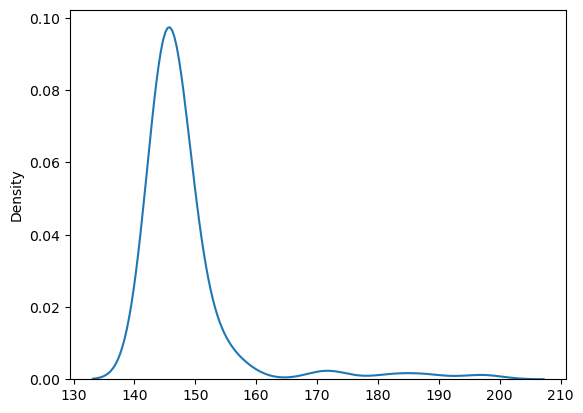

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(errors)
plt.show()

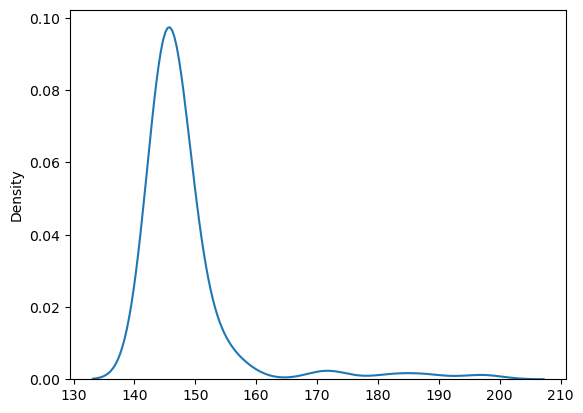

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(errors)
plt.show()

In [ ]:
solution = solve(e_T=train_eT, w2=824, w3=159, w5=362, w6=95, w8=364, w9=63, lambda2=1)
x = np.zeros(66)
for i in solution:
    x[i] = solution[i]
e = p_matrix@x
print(e)
print(train_eT)
print(np.linalg.norm(train_eT-e))

[1745. 1677. 1657. 1582. 1657. 1583. 1715. 1520. 1228. 1252.]
[1005 1553 1180 1682 1911 1424 1628 1494 1084 1454]
979.8402931090352


In [ ]:
I_matrix@x

array([   0., 1745., 1167.,    0., 1796., 1501., 1582., 1166.])